In [1]:
#BEAUTY PRODUCTS RECOMMENDATION SYSTEM************

In [2]:
#PRODUCT POPULARITY BASED RECOMMENDATION SYSTEM TARGETED AT NEW CUSTOMER

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.decomposition import TruncatedSVD
    

In [5]:
data=pd.read_csv('ratings_Beauty.csv')

In [6]:
data.shape

(2023070, 4)

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(2023070, 4)

In [9]:
data.head(3)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200


In [10]:
popular_products=pd.DataFrame(data.groupby('ProductId')['Rating'].count())

In [11]:
popular_products

,Rating
ProductId,
0205616461,1
0558925278,2
0733001998,1
0737104473,1
0762451459,1
...,...
B00LORWRJA,1
B00LOS7MEE,1
B00LP2YB8E,1


In [13]:
most_popular=popular_products.sort_values('Rating',ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


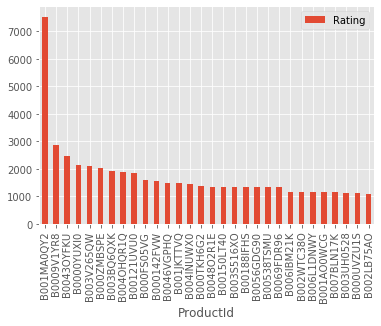

In [14]:
most_popular.head(30).plot(kind='bar')

In [15]:
#THESE ARE THE MOST SOLD PRODUCTS WHICH CAN BE RECOMMENDED TO THE NEW USERS

In [16]:
#MODEL BASED COLLABORATIVE FILTERING
data=data.head(10000)

In [17]:
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [18]:
ratings_utility_matrix=data.pivot_table(values='Rating',index='UserId',columns='ProductId',fill_value=0)

In [19]:
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#THIS IS A SPARSE MATRIX


In [21]:
ratings_utility_matrix.shape

(9697, 886)

In [22]:
X=ratings_utility_matrix.T

In [23]:
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X1=X

In [25]:
#DECOMPOSING   THE MATRIX

In [27]:
SVD=TruncatedSVD(n_components=10)
decomposed_matrix=SVD.fit_transform(X)


In [30]:
decomposed_matrix.shape

(886, 10)

In [31]:
#CORRELATION MATRIX
correlation_matrix=np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [33]:
X.index[100] #CHOOSING A RANDOM PRODUCT

'6117043058'

In [34]:
i='6117043058'
product_names=list(X.index)
product_id=product_names.index(i)
product_id

100

In [37]:
correlation_product_id=correlation_matrix[product_id]
correlation_product_id.shape

(886,)

In [39]:
#RECOMMENDING TOP 10 HIghly COrrelated Products
Recommend=list(X.index[correlation_product_id>0.90])
Recommend.remove(i)

In [40]:
Recommend[0:9]

['1304139212',
 '1304139220',
 '130414089X',
 '130414643X',
 '130414674X',
 '1304174778',
 '1304174867',
 '1304174905',
 '1304196046']

In [41]:
#RECOMMNENDATION USING PRODUCT OVERVIEW
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [42]:
description=pd.read_csv('descriptions.csv')

In [43]:
description.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [44]:
description.dropna(inplace=True)

In [45]:
descriptions=description.head(500)
descriptions['product_description'].head()

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
Name: product_description, dtype: object

In [46]:
vectorizer=TfidfVectorizer(stop_words='english')
X1=vectorizer.fit_transform(descriptions['product_description'])

In [47]:
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

In [48]:
X=X1

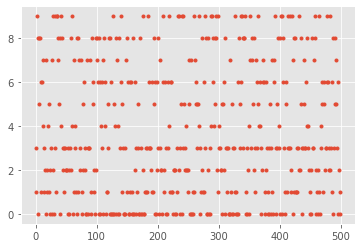

In [49]:
kmeans=KMeans(n_clusters=10,init='k-means++')
y_kmeans=kmeans.fit_predict(X)
plt.plot(y_kmeans,".")
plt.show()

In [50]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [51]:

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 cutting
 easy
 blade
 pliers
 lightweight
 leaf
 joe
 handles
 saw
 bag
Cluster 1:
 wall
 metal
 screws
 design
 screw
 storage
 plated
 piece
 steel
 cabinet
Cluster 2:
 light
 watt
 volt
 led
 power
 bulb
 fixture
 lighting
 bulbs
 use
Cluster 3:
 landscape
 stone
 natural
 door
 pavers
 edging
 walls
 curved
 pallet
 projects
Cluster 4:
 post
 fence
 ft
 rug
 100
 outdoor
 vary
 posts
 great
 wood
Cluster 5:
 tool
 brush
 nozzle
 handle
 pet
 easy
 dust
 provides
 power
 dog
Cluster 6:
 air
 window
 cooling
 insulation
 helps
 filter
 control
 unit
 cool
 conditioner
Cluster 7:
 water
 concrete
 paint
 used
 wood
 easy
 proposition
 nbsp
 residents
 use
Cluster 8:
 patio
 frame
 fabric
 dining
 collection
 chairs
 cushions
 wicker
 rust
 steel
Cluster 9:
 ft
 installation
 use
 easy
 water
 room
 door
 unit
 storage
 control


In [52]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [53]:
show_recommendations("cutting tool")

Cluster 0:
 cutting
 easy
 blade
 pliers
 lightweight
 leaf
 joe
 handles
 saw
 bag


In [54]:
show_recommendations("water")

Cluster 7:
 water
 concrete
 paint
 used
 wood
 easy
 proposition
 nbsp
 residents
 use


In [ ]:
#WORKS BEST WHEN ECOMMERCE BUSINESS'S SITE IS NEW ONE